# Data Exploration

In [168]:
import pandas as pd

train = pd.read_csv("data/train.csv")
train_shape = train.shape

test = pd.read_csv("data/test.csv")
test_shape = test.shape

print(test_shape, train_shape)

(418, 11) (891, 12)


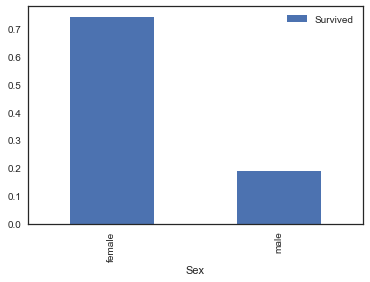

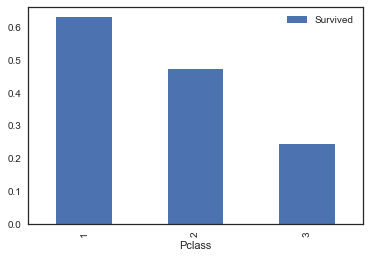

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

train_pivot = train.pivot_table(index="Pclass", values="Survived")
train_pivot.plot.bar()
plt.show()

In [170]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant", "Child","Teenager","Young Adult", "Adult", "Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df
cut_points = [0, 12, 50, 100, 1000]
label_names = ["0-12","12-50","50-100","100+"]

train = process_fare(train,cut_points,label_names)
holdout = process_fare(holdout,cut_points,label_names)
train = create_dummies(train,"Fare_categories")
holdout = create_dummies(holdout,"Fare_categories")


# survived = train[train["Survived"] == 1]
# died = train[train["Survived"] == 0]
# survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
# died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
# plt.legend(['Survived','Died'])
# plt.show()



table_pivot = train.pivot_table(index='Age_categories',values="Survived")
# table_pivot = train.pivot_table(index='Age_categories',values="Died")
table_pivot.plot.bar( color='pink')

table_pivot = train.pivot_table(index='Fare_categories',values="Survived")
table_pivot_died.plot.bar(color='blue')
plt.show()

KeyError: 'Fare'

In [ ]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the `Pclass` column, we know they are 1, 2, and 3.

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [ ]:
train.head()

In [ ]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

In [ ]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

train_X, test_X, train_y, test_y = train_test_split(
    train[columns], train['Survived'], test_size=0.2,random_state=0)
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

accuracy_score(test_y, predictions)

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, train[columns], train['Survived'], cv=10)
accuracy = np.mean(scores)

print(scores)
print(accuracy)

In [ ]:

holdout_ids = holdout["PassengerId"]

lr = LogisticRegression().fit(train[columns], train['Survived'])
holdout_predictions = lr.predict(holdout[columns])
submission = pd.DataFrame({"PassengerId": holdout_ids, "Survived": holdout_predictions})
submission.to_csv("submission_1.csv", index=False)


# Feature Selection
helps to exclude features which are not good predictors, or features that are closely related to each other.

In [ ]:
def process_age(df):
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = process_age(train)
holdout = process_age(holdout)

for column in ["Age_categories","Pclass","Sex"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)

print(train.columns)

In [ ]:
from sklearn.preprocessing import minmax_scale

# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = np.around(holdout["Fare"].fillna(train["Fare"].mean()), decimals=0)

train['Embarked'] = train['Embarked'].fillna("S")
holdout["Embarked"] = holdout["Embarked"].fillna("S")

train = create_dummies(train,'Embarked')
holdout = create_dummies(holdout,"Embarked")    
                         
columns = ["SibSp","Parch","Fare"]
                         
for col in columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    holdout[col + "_scaled"] = minmax_scale(holdout[col])

In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression().fit(train[columns], train['Survived'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index=train[columns].columns)

feature_importance.plot.barh()

The plot shows a range of both positive and negative values. Whether the value is positive or negative isn't as important in this case, relative to the magnitude of the value. If you think about it, this makes sense. A feature that indicates strongly whether a passenger died is just as useful as a feature that indicates strongly that a passenger survived, given they are mutually exclusive outcomes.

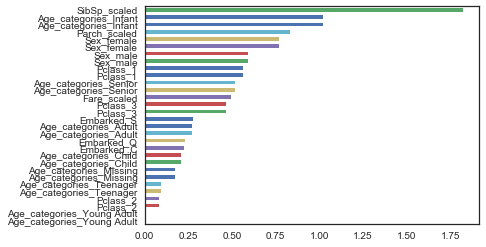

In [171]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [172]:
from sklearn.model_selection import cross_val_score

columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']
all_X = train[columns]
all_y = train['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(accuracy)

KeyError: "['Age_categories_Infant' 'SibSp_scaled' 'Sex_female' 'Sex_male' 'Pclass_1'\n 'Pclass_3' 'Age_categories_Senior' 'Parch_scaled'] not in index"

In [ ]:
from sklearn.model_selection import cross_val_score

columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']


lr = LogisticRegression()
scores = cross_val_score(lr, train[columns], train['Survived'], cv=10)
accuracy = scores.mean()
print(accuracy)

In [ ]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]
all_y = train['Survived']
lr = LogisticRegression().fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])


submission = pd.DataFrame({
                            'PassengerId': holdout['PassengerId'],
                           'Survived': holdout_predictions
                          })
submission.to_csv("submission_1.csv", index=False)

In [ ]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Fare"].plot.hist(alpha=0.5,color='red',bins=50)
died["Fare"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

Let's look at histograms of the Fare column for passengers who died and survived, and see if there are patterns that we can use when creating our bins.
Looking at the values, it looks like we can separate the feature into four bins to capture some patterns from the data:

* 0-12  
* 12-50  
* 50-100  
* 100+  

Another way to engineer features is by extracting data from text columns. Earlier, we decided that the Name and Cabin columns weren't useful by themselves, but what if there is some data there we could extract? Let's take a look at a random sample of rows from those two columns:



In [ ]:
train[['Name','Cabin']].tail(45)

Looking at the Name column, There is a title like 'Mr' or 'Mrs' within each, as well as some less common titles, like the 'Countess' from the final row of our table above. By spending some time researching the different titles, we can categorize these into six types:

Mr   
Mrs   
Master   
Miss   
Officer   
Royalty   
We can extract the title from each name and then use the Series.map() method and a predefined dictionary to simplify the titles.

In [ ]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)

extracted_titles = holdout["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
holdout['Title']  = extracted_titles.map(titles)

While in isolation the cabin number of each passenger will be reasonably unique to each, we can see that the format of the cabin numbers is one letter followed by two numbers. It seems like the letter is representative of the type of cabin, which could be useful data for us. 

In [ ]:
train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

holdout["Cabin_type"] = holdout["Cabin"].str[0]
holdout["Cabin_type"] = holdout["Cabin_type"].fillna("Unknown")

for column in ["Title","Cabin_type"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)

Since we made many dummy columns we have to ensure we are not falling into **the dummy variable trap**

The darker squares, whether the darker red or darker blue, indicate pairs of columns that have higher correlation and may lead to collinearity. 

In [173]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns])

KeyError: "['Age_categories_Missing' 'Age_categories_Infant' 'Age_categories_Child'\n 'Age_categories_Teenager' 'Age_categories_Young Adult'\n 'Age_categories_Adult' 'Age_categories_Senior' 'Pclass_1' 'Pclass_2'\n 'Pclass_3' 'Sex_female' 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S'\n 'SibSp_scaled' 'Parch_scaled' 'Fare_categories_0-12'\n 'Fare_categories_12-50' 'Fare_categories_50-100' 'Fare_categories_100+'\n 'Title_Master' 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Officer'\n 'Title_Royalty' 'Cabin_type_A' 'Cabin_type_B' 'Cabin_type_C'\n 'Cabin_type_D' 'Cabin_type_E' 'Cabin_type_F' 'Cabin_type_G'\n 'Cabin_type_T' 'Cabin_type_Unknown'] not in index"

We can see that there is a high correlation between `Sex_female`/`Sex_male` and `Title_Miss`/`Title_Mr`/`Title_Mrs`. We will remove the columns Sex_female and Sex_male since the title data may be more nuanced.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

Pclass_2  
Age_categories_Teenager  
Fare_categories_12-50  
Title_Master  
Cabin_type_A  

In [174]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]

lr = LogisticRegression()
selector = RFECV(lr, cv=10)
selector.fit(all_X, all_y)
optimized_columns = all_X.columns[selector.support_]
print(optimized_columns)

KeyError: "['Age_categories_Missing' 'Age_categories_Infant' 'Age_categories_Child'\n 'Age_categories_Young Adult' 'Age_categories_Adult'\n 'Age_categories_Senior' 'Pclass_1' 'Pclass_3' 'Embarked_C' 'Embarked_Q'\n 'Embarked_S' 'SibSp_scaled' 'Parch_scaled' 'Fare_categories_0-12'\n 'Fare_categories_50-100' 'Fare_categories_100+' 'Title_Miss' 'Title_Mr'\n 'Title_Mrs' 'Title_Officer' 'Title_Royalty' 'Cabin_type_B' 'Cabin_type_C'\n 'Cabin_type_D' 'Cabin_type_E' 'Cabin_type_F' 'Cabin_type_G'\n 'Cabin_type_T' 'Cabin_type_Unknown'] not in index"

In [175]:
all_X  = train[optimized_columns]
all_y = train["Survived"]
lr = LogisticRegression()
score = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = score.mean()
accuracy

KeyError: "Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object') not in index"

# Testing Different Algorithms

In [176]:
from sklearn.neighbors import KNeighborsClassifier

all_X = train[columns]
all_y = train["Survived"]

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = scores.mean()
accuracy_knn

KeyError: "['Age_categories_Missing' 'Age_categories_Infant' 'Age_categories_Child'\n 'Age_categories_Young Adult' 'Age_categories_Adult'\n 'Age_categories_Senior' 'Pclass_1' 'Pclass_3' 'Embarked_C' 'Embarked_Q'\n 'Embarked_S' 'SibSp_scaled' 'Parch_scaled' 'Fare_categories_0-12'\n 'Fare_categories_50-100' 'Fare_categories_100+' 'Title_Miss' 'Title_Mr'\n 'Title_Mrs' 'Title_Officer' 'Title_Royalty' 'Cabin_type_B' 'Cabin_type_C'\n 'Cabin_type_D' 'Cabin_type_E' 'Cabin_type_F' 'Cabin_type_G'\n 'Cabin_type_T' 'Cabin_type_Unknown'] not in index"

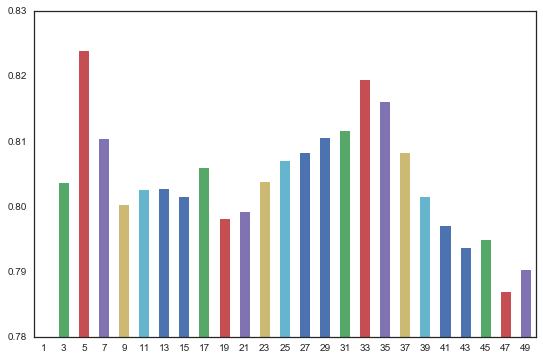

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    knn_scores[k] = scores.mean()
    
plot_dict(knn_scores)

In [178]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=hyperparameters,cv=10)
grid.fit(all_X, all_y)
best_params = grid.best_params_
best_score = grid.best_score_

print(grid)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20, 2), 'weights': ['distance', 'uniform'], 'algorithm': ['brute'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [179]:
print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.8237934904601572


In [184]:
# holdout_no_id = holdout.drop(['PassengerId'],axis=1)
# best_knn = grid.best_estimator_

# holdout_predictions = best_knn.predict(holdout_no_id)

# holdout_ids = holdout["PassengerId"]
# submission_df = {"PassengerId": holdout_ids,
#                  "Survived": holdout_predictions}

# submission = pd.DataFrame(submission_df)
# submission.to_csv("data/submission_knn.csv",index=False)

In [185]:
from  sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
accuracy_rf

0.8238664737260242

In [187]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
                  }

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=10)

grid.fit(all_X, all_y)

best_score = grid.best_score_
best_params = grid.best_params_

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
0.8327721661054994


In [190]:
# best_rf = grid.best_estimator_

# holdout_predictions = best_rf.predict(holdout_no_id)

# submission = pd.DataFrame({"PassengerId": holdout_ids,
#                  "Survived": holdout_predictions})

# submission.to_csv("submission_rf.csv",index=False)

In [192]:
import pandas as pd

train = pd.read_csv("data/train.csv")
holdout = pd.read_csv("data/test.csv")

In [193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
# %load data/functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [198]:
def pre_process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)

    for col in ["Age_categories","Fare_categories",
                "Title","Cabin_type","Sex"]:
        df = create_dummies(df,col)
    
    return df

train = pre_process(train)
holdout = pre_process(holdout)

In [199]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
SibSp       891 non-null int64
Parch       891 non-null int64
Survived    891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB


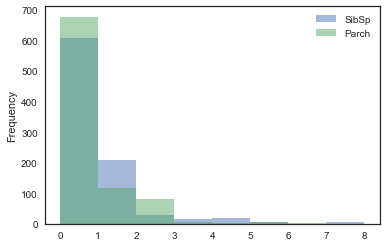

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline

explore.drop("Survived",axis=1).plot.hist(alpha=0.5,bins=8)
plt.show()

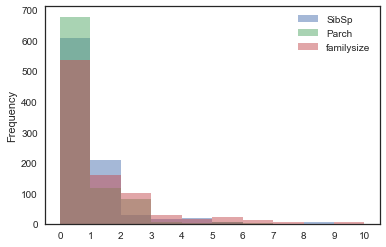

In [201]:
explore["familysize"] = explore[["SibSp","Parch"]].sum(axis=1)
explore.drop("Survived",axis=1).plot.hist(alpha=0.5,bins=10)
plt.xticks(range(11))
plt.show()

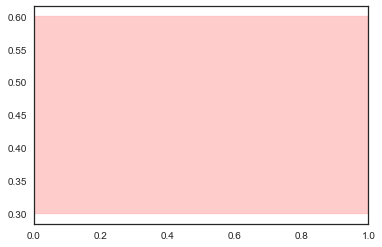

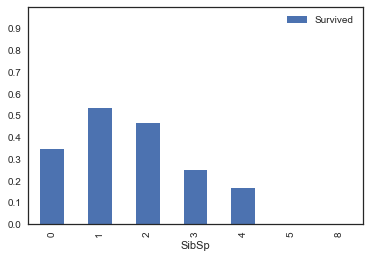

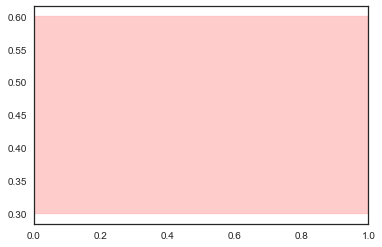

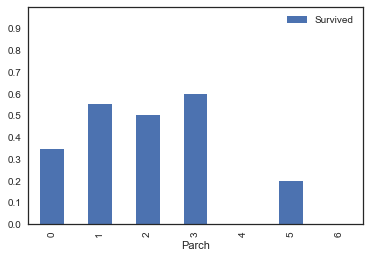

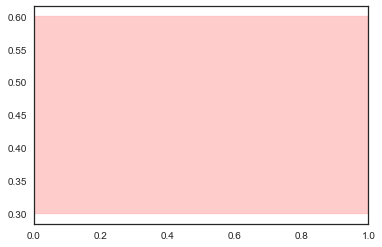

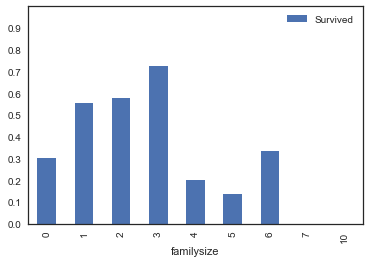

In [202]:
import numpy as np

for col in explore.columns.drop("Survived"):
    pivot = explore.pivot_table(index=col,values="Survived")
    plt.axhspan(.3, .6, alpha=0.2, color='red')
    pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1))
    plt.show()


The SibSp column shows the number of siblings and/or spouses each passenger had on board, while the Parch columns shows the number of parents or children each passenger had onboard. Neither column has any missing values.

The distribution of values in both columns is skewed right, with the majority of values being zero.

You can sum these two columns to explore the total number of family members each passenger had onboard. The shape of the distribution of values in this case is similar, however there are less values at zero, and the quantity tapers off less rapidly as the values increase.

Looking at the survival rates of the the combined family members, you can see that few of the over 500 passengers with no family members survived, while greater numbers of passengers with family members survived.

## Engineering New Features

In [205]:
def process_isalone(df):
    df["familysize"] = df[["SibSp","Parch"]].sum(axis=1)
    df["isalone"] = 0
    df.loc[(df["familysize"] == 0),"isalone"] = 1
    df = df.drop("familysize",axis=1)
    return df

train = process_isalone(train)
holdout = process_isalone(holdout)

## Selecting the Best-Performing Features

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    # Remove non-numeric columns, columns that have null values
    df = df.select_dtypes([np.number]).dropna(axis=1)
    all_X = df.drop(["Survived","PassengerId"],axis=1)
    all_y = df["Survived"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf,cv=10)
    selector.fit(all_X,all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

cols = select_features(train)

Best Columns 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']



In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def select_model(df,features):
    
    all_X = df[features]
    all_y = df["Survived"]

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(train,cols)

LogisticRegression
------------------
Best Score: 0.8204264870931538
Best Parameters: {'solver': 'liblinear'}

KNeighborsClassifier
--------------------
Best Score: 0.7755331088664422
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

RandomForestClassifier
----------------------
Best Score: 0.8294051627384961
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 4}



In [212]:
def  save_submission_file(model,cols,filename="data/submission.csv"):
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename,index=False)

best_rf_model = result[2]["best_model"]
save_submission_file(best_rf_model,cols)

# Next Step

* Continue to explore the data and create new features, following the workflow and using the functions we created.   
* Read more about the titanic and this Kaggle competition to get ideas for new features.   
* Use some different algorithms in the select_model() function, like support vector machines, stochastic gradient descent or perceptron linear models.   
* Experiment with RandomizedSearchCV instead of GridSearchCV to speed up your select_features() function.   